In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv("Chicago_Energy_Benchmarking.csv")
data.head(2)

,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID
0,2019,159005,Corliss HS -CPS,Not Submitted,821 E 103rd St,NaN,0.0,False,PULLMAN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41.706496,-87.602690,"(41.70649646, -87.60268998)",2019-159005
1,2020,101716,311 S Wacker,Submitted Data,311 S Wacker,60606,4.0,False,LOOP,Office,...,48.1,134.6,50.3,140.9,10757.3,7.5,41.877458,-87.635738,"(41.87745822, -87.63573828)",2020-101716


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17728 entries, 0 to 17727
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Data Year                                   17728 non-null  int64  
 1   ID                                          17728 non-null  int64  
 2   Property Name                               16535 non-null  object 
 3   Reporting Status                            17728 non-null  object 
 4   Address                                     17728 non-null  object 
 5   ZIP Code                                    16504 non-null  object 
 6   Chicago Energy Rating                       9739 non-null   float64
 7   Exempt From Chicago Energy Rating           10450 non-null  object 
 8   Community Area                              17637 non-null  object 
 9   Primary Property Type                       15107 non-null  object 
 10  Gross Floo

# Exploratary Data Analysis


The report analysis depicts that :

The dataframe has 17728  rows and each row represents a housing project.

The dataframe has 30 features(columns).

info() method hepls in knowing the quick description about the dataframe.

In [30]:
data.rename(columns={'Data Year': 'Year', '# of Buildings': 'NumberOfBuildings', 'Chicago Energy Rating': 'CERating'}, inplace=True)

Renaming the below columns for readability

1) 'Data Year': 'Year'
     
2) '# of Buildings': 'NumberOfBuildings'
    
3) 'Chicago Energy Rating': 'CERating'

In [31]:
data.drop(['Property Name', 'Address', 'ZIP Code', 'Water Use (kGal)', 'District Steam Use (kBtu)', 'District Chilled Water Use (kBtu)', 'All Other Fuel Use (kBtu)', 'Site EUI (kBtu/sq ft)', 'Source EUI (kBtu/sq ft)', 'Weather Normalized Site EUI (kBtu/sq ft)', 'Weather Normalized Source EUI (kBtu/sq ft)', 'Location', 'Row_ID'], axis=1, inplace=True)

Dropping below columns as they contain less values or after careful observation and research I thought, they have no value in yeilding the target varaible through model.


'Property Name', 'Address', 'ZIP Code', 'Water Use (kGal)'

'District Steam Use (kBtu)', 'District Chilled Water Use (kBtu)'

'All Other Fuel Use (kBtu)', 'Site EUI (kBtu/sq ft)'

'Source EUI (kBtu/sq ft)', 'Weather Normalized Site EUI (kBtu/sq ft)'

'Weather Normalized Source EUI (kBtu/sq ft)', 'Location', 'Row_ID', 'Latitude', 'Longitude' 



In [32]:
data['Exempt From Chicago Energy Rating'] = data['Exempt From Chicago Energy Rating'].astype('bool')

Changing the column 'Exempt From Chicago Energy Rating' type as boolean but not executing this statement as boolean values are generating errors while generating Correlation Matrix

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17728 entries, 0 to 17727
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    17728 non-null  int64  
 1   ID                                      17728 non-null  int64  
 2   Reporting Status                        17728 non-null  object 
 3   CERating                                9739 non-null   float64
 4   Exempt From Chicago Energy Rating       17728 non-null  bool   
 5   Community Area                          17637 non-null  object 
 6   Primary Property Type                   15107 non-null  object 
 7   Gross Floor Area - Buildings (sq ft)    16364 non-null  float64
 8   Year Built                              15105 non-null  float64
 9   NumberOfBuildings                       15698 non-null  float64
 10  ENERGY STAR Score                       12894 non-null  fl

<AxesSubplot:>

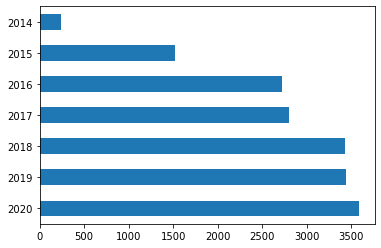

In [34]:
data.Year.value_counts().plot(kind='barh')

A significant of properties reported their Energy usages for Years 2018, 19 and 20.

Hence, Considering the data for the years 2018, 19 and 20.


In [35]:
df = data.loc[data.Year >= 2018]
df.head(2)

,Year,ID,Reporting Status,CERating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,NumberOfBuildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude
0,2019,159005,Not Submitted,0.0,False,PULLMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.706496,-87.602690
1,2020,101716,Submitted Data,4.0,False,LOOP,Office,1627486.0,1990.0,1.0,75.0,68926498.9,NaN,10757.3,7.5,41.877458,-87.635738


In [36]:
df.shape

(10450, 17)

<AxesSubplot:>

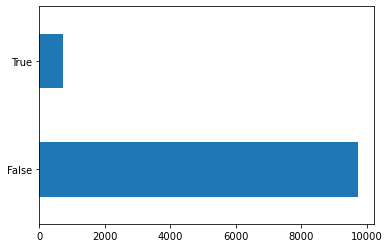

In [37]:
df['Exempt From Chicago Energy Rating'].value_counts().plot(kind='barh')

Some of the properties have Exempt From Chicago Energy Rating status as True not reported Energy usage as they either claim 'Not eligible' or 'Not Submitted'.

We may remove them in future while training the model.

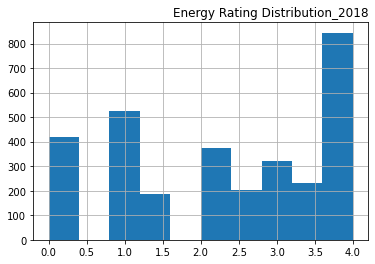

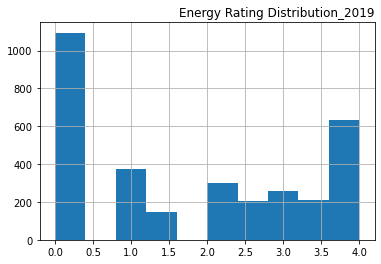

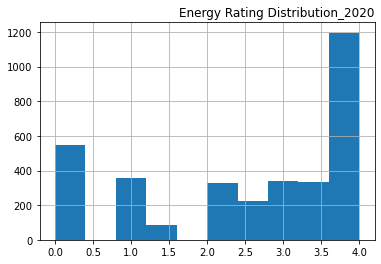

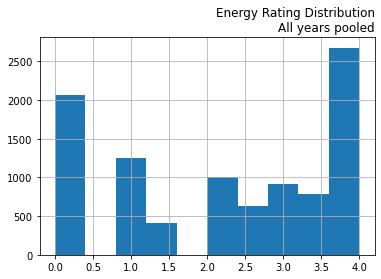

In [38]:
df_2018 = data.loc[data.Year == 2018]
df_2018['CERating'].hist(bins=10)
plt.title('Energy Rating Distribution_2018', loc='right')
plt.show()

df_2019 = data.loc[data.Year == 2019]
df_2019['CERating'].hist(bins=10)
plt.title('Energy Rating Distribution_2019', loc='right')
plt.show()

df_2020 = data.loc[data.Year == 2020]
df_2020['CERating'].hist(bins=10)
plt.title('Energy Rating Distribution_2020', loc='right')
plt.show()

df['CERating'].hist(bins=10)
plt.title('Energy Rating Distribution\nAll years pooled', loc='right')
plt.show()


According the Energy Rating Distibution below is the energy scores breakdown for each year ,

1) In 2018, Highest number of Properties are reported between 2-4

2) In 2019, The trend has been dropped as many number of properties have either not reported or not efficiently utilized energy.

3) In 2020, The trend came back to normal with increasing participation from the stakeholders.




Note: 
    
    0 - Not Efficient Energy Consumer/Not Reported
    4 - Effiicient Energy Consumer

<AxesSubplot:>

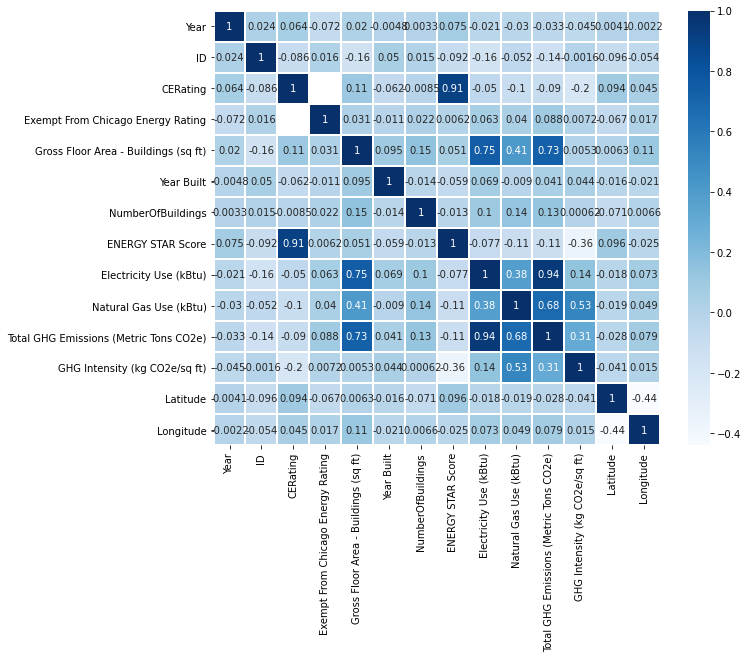

In [39]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap="Blues", annot=True, linewidths=1)

According to the correlation the following are being considered,

1) As 'Total GHG Emissions (Metric Tons CO2e)' and 'Electricity Usage (kBtu)' are correlated about 94%, We may consider removing 'Total GHG Emissions (Metric Tons CO2e)' as they both carry almost same information. 

2) As 'CERating' and 'ENERGY START Score' are correlated about 91%, We may consider removing 'ENERGY START Score' as they both carry almost same information. Moreover, According to changed Chicago Energy Benchmarking Rules properties started reporting in the format 0-4 instead of 0-100.

3) As 'Gross Floor Area - Buildings (sq ft)' and 'Electricity Use (kBtu)' are correlated about 75%, We might consider removing 'Electricity Use (kBtu)' as they both carry almost same information.

4) As 'Gross Floor Area - Buildings (sq ft)' and 'Total GHG Emissions (Metric Tons CO2e)' are correlated about 73%, We might consider removing 'Total GHG Emissions (Metric Tons CO2e)' as they both carry almost same information.

# Geographical locations of the Properties that are effectively participating in reporting Energy Consumption

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

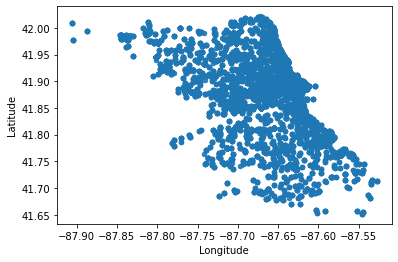

In [40]:
data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.9)

<AxesSubplot:>

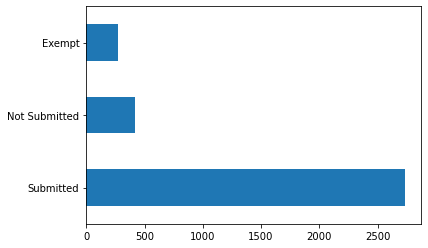

In [54]:
df_2018['Reporting Status'].value_counts().plot(kind='barh')

<AxesSubplot:>

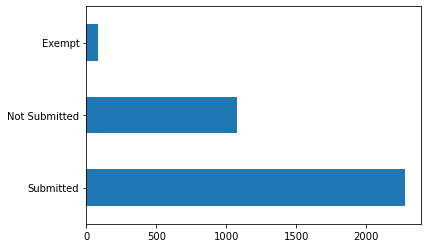

In [55]:
df_2019['Reporting Status'].value_counts().plot(kind='barh')

<AxesSubplot:>

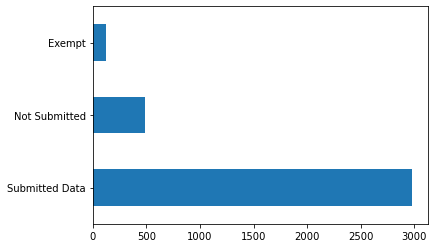

In [56]:
df_2020['Reporting Status'].value_counts().plot(kind='barh')

From above graphs, It is eveident that the partcipation of stakeholders is explonentially growing by each year.

# Conclusion:


In [ ]:
Data looks consistant to build a model. I further invistigate the data to see if any parameters contribute in yielding the output varibale ''